In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI/5KindsOfFlowers/

/content/drive/MyDrive/AI/5KindsOfFlowers


In [ ]:
#Import các thư viện liên quan cần sử dụng
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Thư viện tạo mô hình CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical # one hot encoding

#Thư viện vẽ đồ thị
from matplotlib import pyplot as plt 

from sklearn import preprocessing
from tensorflow.keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu chứa dữ liệu dùng để training
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/5KindsOfFlowers/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1208 images belonging to 5 classes.


In [ ]:
# Lấy ra tên của từng thư mục chứa từng loại dữ liệu
training_set.class_indices

{'apricot': 0, 'daisy pink': 1, 'lotus': 2, 'rose': 3, 'water lily': 4}

In [ ]:
#Define và compile CNN model
model=Sequential()

# Nhân tích chập 32 lần
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 64 lần 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 128 lần 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
#Complie mô hình CNN
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Lưu lại giá trị mỗi lần học để vẽ ra đồ thị
history=model.fit(training_set,epochs=30,batch_size=128,verbose=1)

Epoch 1/30
38/38 [==============================] - 124s 3s/step - loss: 2.0780 - accuracy: 0.7823
Epoch 2/30
38/38 [==============================] - 97s 3s/step - loss: 0.4614 - accuracy: 0.8568
Epoch 3/30
38/38 [==============================] - 96s 3s/step - loss: 0.3789 - accuracy: 0.8733
Epoch 4/30
38/38 [==============================] - 105s 3s/step - loss: 0.2757 - accuracy: 0.8998
Epoch 5/30
38/38 [==============================] - 97s 3s/step - loss: 0.2777 - accuracy: 0.9073
Epoch 6/30
38/38 [==============================] - 97s 3s/step - loss: 0.2597 - accuracy: 0.9114
Epoch 7/30
38/38 [==============================] - 99s 3s/step - loss: 0.2148 - accuracy: 0.9313
Epoch 8/30
38/38 [==============================] - 100s 3s/step - loss: 0.1825 - accuracy: 0.9338
Epoch 9/30
38/38 [==============================] - 104s 3s/step - loss: 0.2322 - accuracy: 0.9263
Epoch 10/30
38/38 [==============================] - 97s 3s/step - loss: 0.1817 - accuracy: 0.9379
Epoch 11/30
38/

In [ ]:
#Độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.040810104459524155
Train Accuracy 0.9908940196037292


<function matplotlib.pyplot.show(close=None, block=None)>

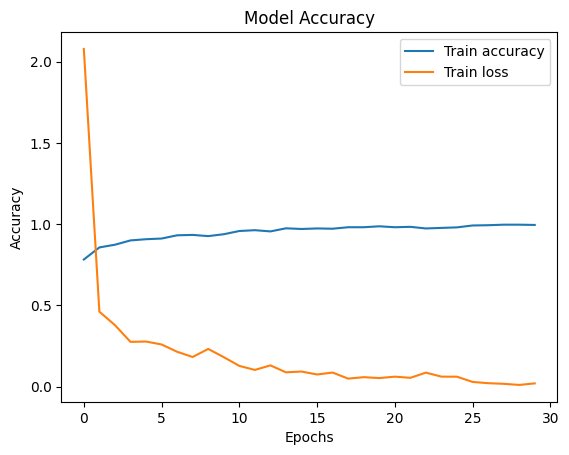

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [ ]:
# Lưu lại dữ liệu sau khi train
model.save("5Flowers.h5")

In [ ]:
#Load mô hình đã lưu
model_CNN=load_model('5Flowers.h5')

1/1 [==============================] - 0s 54ms/step
lotus


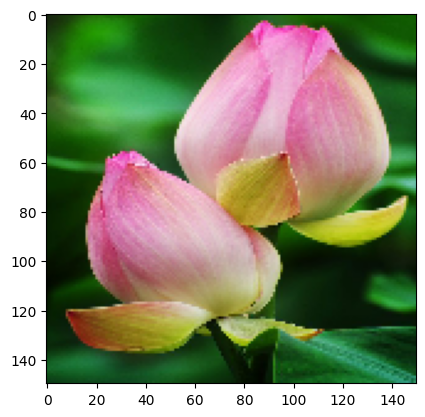

1/1 [==============================] - 0s 50ms/step
lotus


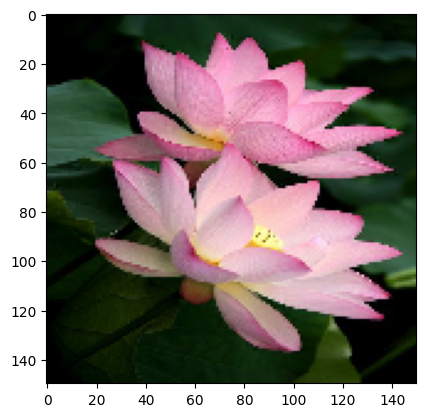

1/1 [==============================] - 0s 48ms/step
daisy pink


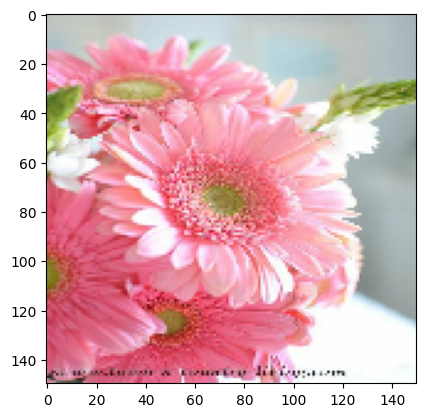

1/1 [==============================] - 0s 47ms/step
water lily


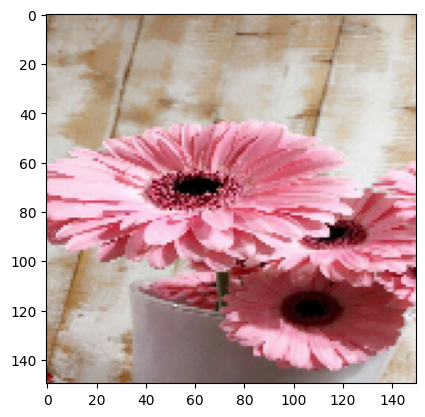

1/1 [==============================] - 0s 45ms/step
rose


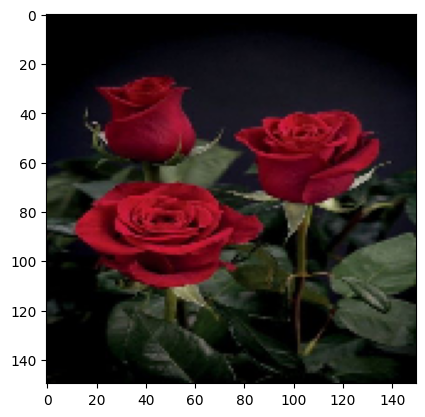

1/1 [==============================] - 0s 46ms/step
rose


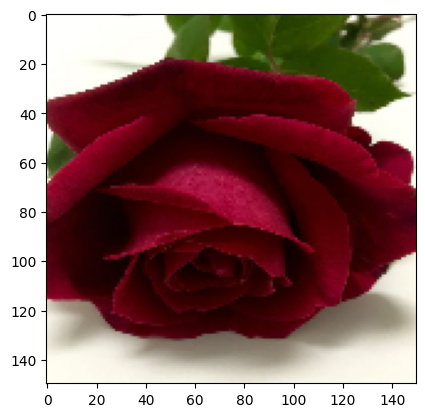

1/1 [==============================] - 0s 47ms/step
rose


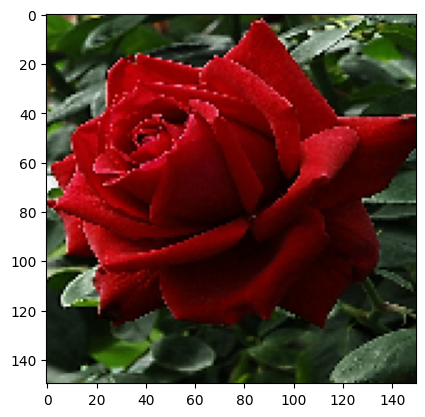

1/1 [==============================] - 0s 58ms/step
apricot


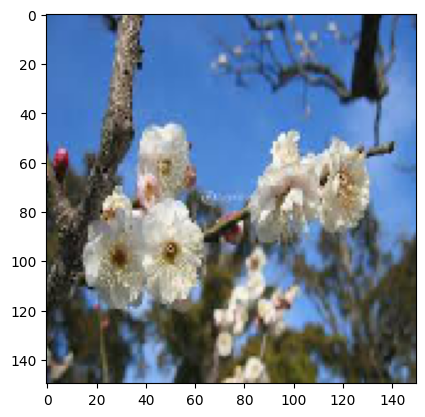

1/1 [==============================] - 0s 71ms/step
apricot


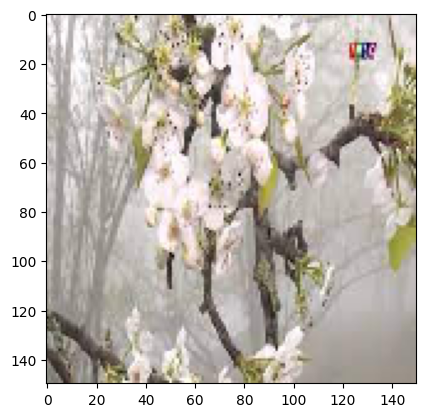

1/1 [==============================] - 0s 51ms/step
water lily


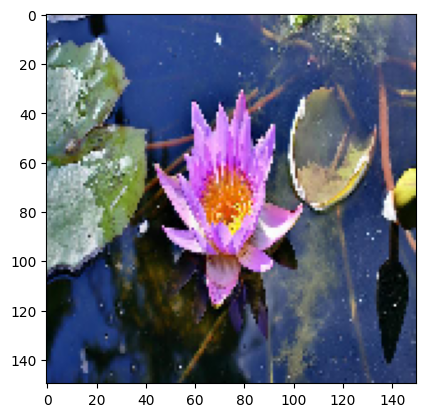

1/1 [==============================] - 0s 48ms/step
water lily


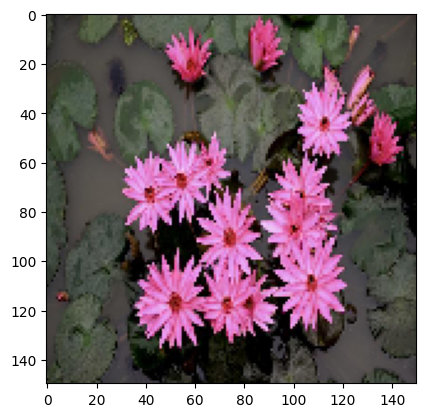

1/1 [==============================] - 0s 44ms/step
water lily


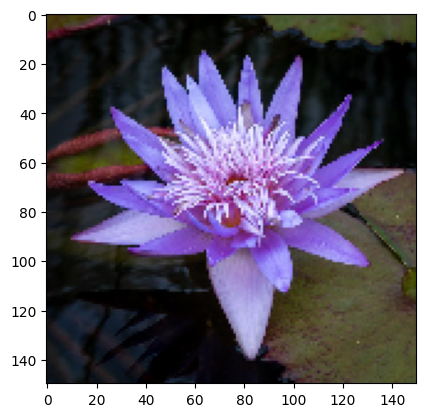

In [ ]:
#Testing
test="/content/drive/MyDrive/AI/5KindsOfFlowers/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['apricot', 'daisy pink', 'lotus', 'rose', 'water lily']
  
  print(class_name[result])
  plt.show()